<a href="https://colab.research.google.com/github/nastyaivt/MO/blob/main/%D0%BB%D0%B0%D0%B1%D0%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Размер обучающей выборки: 160
Размер тестовой выборки: 40


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.91818e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.15316e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.67941e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.4458e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.56194e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python

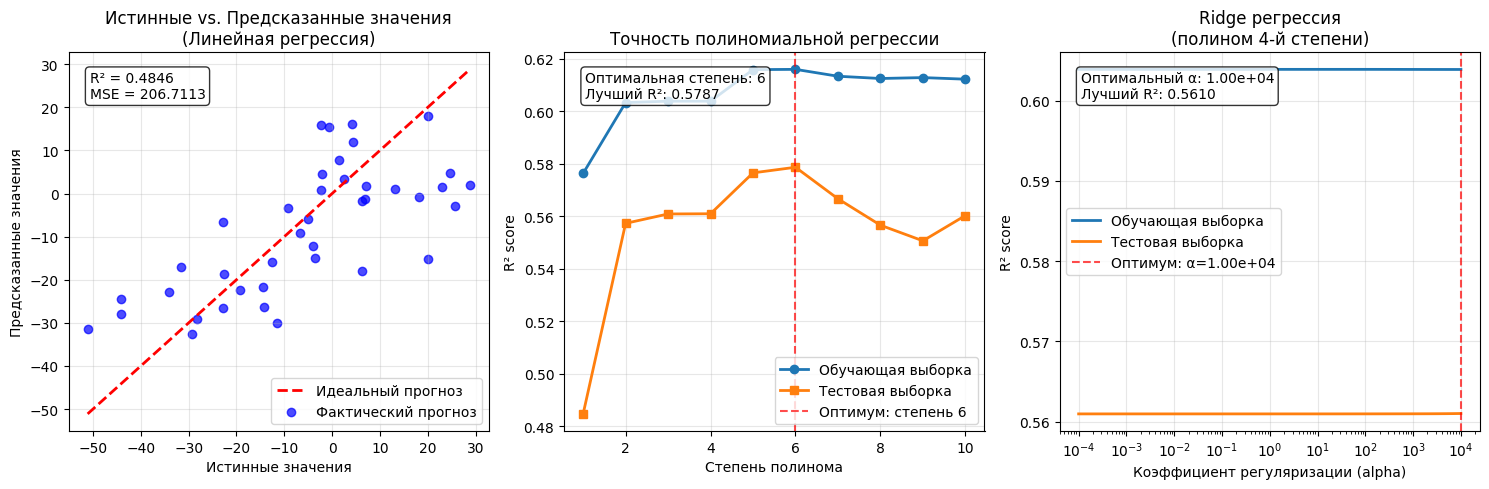


РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ

1. ЛИНЕЙНАЯ РЕГРЕССИЯ:
   R² на тестовой выборке: 0.4846
   MSE на тестовой выборке: 206.7113

2. ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ:
   Оптимальная степень полинома: 6
   Лучший R² на тестовой выборке: 0.5787

3. RIDGE РЕГРЕССИЯ (полином 4-й степени):
   Оптимальный коэффициент регуляризации: 10000.000000
   Лучший R² на тестовой выборке: 0.5610

СРАВНЕНИЕ ЛУЧШИХ МОДЕЛЕЙ
Линейная регрессия:      R² = 0.4846
Полиномиальная (степень 6): R² = 0.5787
Ridge (α=1.00e+04): R² = 0.5610

ЛУЧШАЯ МОДЕЛЬ: Полином 6 с R² = 0.5787


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Генерация синтетических данных для лабораторной работы
np.random.seed(42)
n_samples = 200

# Генерируем данные: относительное положение среза как функция от номера среза
slice_numbers = np.linspace(0, 100, n_samples)
# Истинная зависимость: полином 3-й степени + шум
true_position = 10 + 0.5 * slice_numbers - 0.02 * slice_numbers ** 2 + 0.0001 * slice_numbers ** 3
noise = np.random.normal(0, 15, n_samples)
relative_position = true_position + noise


# Функция для разделения данных на обучающую и тестовую выборки
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples = len(X)
    n_test = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


# Разделение данных
X = slice_numbers.reshape(-1, 1)
y = relative_position
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# 1. Линейная регрессия для первого графика
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# ГРАФИК 1: Истинные значения vs. Предсказанные значения
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Идеальная линия прогноза (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Идеальный прогноз')

# Фактические предсказания
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Фактический прогноз')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs. Предсказанные значения\n(Линейная регрессия)')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем метрики качества на график
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
plt.text(0.05, 0.95, f'R² = {r2:.4f}\nMSE = {mse:.4f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

# 2. Полиномиальная регрессия
degrees = range(1, 11)
train_scores_poly = []
test_scores_poly = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)

    train_score = r2_score(y_train, y_train_pred_poly)
    test_score = r2_score(y_test, y_test_pred_poly)

    train_scores_poly.append(train_score)
    test_scores_poly.append(test_score)

# ГРАФИК 2: Модель с использованием полиномиальной функции
plt.subplot(1, 3, 2)
plt.plot(degrees, train_scores_poly, 'o-', linewidth=2, label='Обучающая выборка', markersize=6)
plt.plot(degrees, test_scores_poly, 's-', linewidth=2, label='Тестовая выборка', markersize=6)
plt.xlabel('Степень полинома')
plt.ylabel('R² score')
plt.title('Точность полиномиальной регрессии')
plt.legend()
plt.grid(True, alpha=0.3)

# Находим и отмечаем оптимальную степень
optimal_degree = degrees[np.argmax(test_scores_poly)]
optimal_score = max(test_scores_poly)
plt.axvline(x=optimal_degree, color='red', linestyle='--', alpha=0.7, label=f'Оптимум: степень {optimal_degree}')
plt.legend()

# Добавляем аннотацию с оптимальными параметрами
plt.text(0.05, 0.95, f'Оптимальная степень: {optimal_degree}\nЛучший R²: {optimal_score:.4f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

# 3. Регуляризация (Ridge регрессия)
alphas = np.logspace(-4, 4, 50)
train_scores_ridge = []
test_scores_ridge = []

# Используем полином 4-й степени для демонстрации регуляризации
poly_degree = 4

for alpha in alphas:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=poly_degree)),
        ('ridge', Ridge(alpha=alpha))
    ])

    model.fit(X_train, y_train)

    y_train_pred_ridge = model.predict(X_train)
    y_test_pred_ridge = model.predict(X_test)

    train_score = r2_score(y_train, y_train_pred_ridge)
    test_score = r2_score(y_test, y_test_pred_ridge)

    train_scores_ridge.append(train_score)
    test_scores_ridge.append(test_score)

# ГРАФИК 3: Модель с использованием регуляризации
plt.subplot(1, 3, 3)
plt.semilogx(alphas, train_scores_ridge, linewidth=2, label='Обучающая выборка')
plt.semilogx(alphas, test_scores_ridge, linewidth=2, label='Тестовая выборка')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R² score')
plt.title(f'Ridge регрессия\n(полином {poly_degree}-й степени)')
plt.legend()
plt.grid(True, alpha=0.3)

# Находим и отмечаем оптимальный коэффициент регуляризации
optimal_alpha = alphas[np.argmax(test_scores_ridge)]
optimal_ridge_score = max(test_scores_ridge)
plt.axvline(x=optimal_alpha, color='red', linestyle='--', alpha=0.7,
            label=f'Оптимум: α={optimal_alpha:.2e}')

# Добавляем аннотацию с оптимальными параметрами
plt.text(0.05, 0.95, f'Оптимальный α: {optimal_alpha:.2e}\nЛучший R²: {optimal_ridge_score:.4f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

plt.legend()

plt.tight_layout()
plt.show()

# Вывод результатов в консоль
print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ")
print("=" * 60)

print(f"\n1. ЛИНЕЙНАЯ РЕГРЕССИЯ:")
print(f"   R² на тестовой выборке: {r2:.4f}")
print(f"   MSE на тестовой выборке: {mse:.4f}")

print(f"\n2. ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ:")
print(f"   Оптимальная степень полинома: {optimal_degree}")
print(f"   Лучший R² на тестовой выборке: {optimal_score:.4f}")

print(f"\n3. RIDGE РЕГРЕССИЯ (полином {poly_degree}-й степени):")
print(f"   Оптимальный коэффициент регуляризации: {optimal_alpha:.6f}")
print(f"   Лучший R² на тестовой выборке: {optimal_ridge_score:.4f}")

# Демонстрация лучших моделей
print(f"\n" + "=" * 60)
print("СРАВНЕНИЕ ЛУЧШИХ МОДЕЛЕЙ")
print("=" * 60)

# Лучшая полиномиальная модель
best_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)),
    ('linear', LinearRegression())
])
best_poly_model.fit(X_train, y_train)
y_pred_best_poly = best_poly_model.predict(X_test)
r2_best_poly = r2_score(y_test, y_pred_best_poly)

# Лучшая Ridge модель
best_ridge_model = Pipeline([
    ('poly', PolynomialFeatures(degree=poly_degree)),
    ('ridge', Ridge(alpha=optimal_alpha))
])
best_ridge_model.fit(X_train, y_train)
y_pred_best_ridge = best_ridge_model.predict(X_test)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f"Линейная регрессия:      R² = {r2:.4f}")
print(f"Полиномиальная (степень {optimal_degree}): R² = {r2_best_poly:.4f}")
print(f"Ridge (α={optimal_alpha:.2e}): R² = {r2_best_ridge:.4f}")

# Определяем лучшую модель
models = {
    'Линейная': r2,
    f'Полином {optimal_degree}': r2_best_poly,
    f'Ridge': r2_best_ridge
}
best_model_name = max(models, key=models.get)
best_model_score = models[best_model_name]

print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model_name} с R² = {best_model_score:.4f}")